In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [22]:
# Baseline: independent search
baseline_folder = r"E:\data\gst-0730-23\Baseline_12knowledge"
g_performance_file = baseline_folder + r"\g_performance_across_K"
s_performance_file = baseline_folder + r"\s_performance_across_K"

g_variance_file = baseline_folder + r"\g_variance_across_K"
s_variance_file = baseline_folder + r"\s_variance_across_K"

with open(g_performance_file, 'rb') as infile:
    g_fitness = pickle.load(infile)
with open(s_performance_file, 'rb') as infile:
    s_fitness = pickle.load(infile)

with open(g_variance_file, 'rb') as infile:
    g_variance = pickle.load(infile)
with open(s_variance_file, 'rb') as infile:
    s_variance = pickle.load(infile)


print(g_fitness)

[0.8328241365138888, 0.7821215188644208, 0.7593962367603265, 0.7452251817960396, 0.7420317687460894, 0.7368563213208111, 0.7261022420275551, 0.7169818524959954, 0.7105988441234078]


In [23]:
data_folder = r"E:\data\gst-0815-23\Hyper-parameters\EvaluatingForwardBackward_GG"
# GG
roll_forward_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
roll_back_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

multiple_lines = {}
for roll_forward in roll_forward_list:
    for roll_back in roll_back_list:
        gg_fitness, gg_variance, gg_fitness_across_time = [], [], []
        gg_performance_file = data_folder + r"\gg_performance_across_K_forward_{0}_backward_{1}".format(roll_forward, roll_back)
        gg_variance_file = data_folder + r"\gg_variance_across_K_forward_{0}_backward_{1}".format(roll_forward, roll_back)
        gg_performance_time_file = data_folder + r"\gg_performance_across_K_time_forward_{0}_backward_{1}".format(roll_forward, roll_back)

        # GG
        with open(gg_performance_file, 'rb') as infile:
            gg_fitness.append(pickle.load(infile))
        with open(gg_variance_file, 'rb') as infile:
            gg_variance.append(pickle.load(infile))
        with open(gg_performance_time_file, 'rb') as infile:
            gg_fitness_across_time.append(pickle.load(infile))
        multiple_lines["a={0}, b={1}".format(roll_forward, roll_back)] = gg_fitness[0]
        
print(len(multiple_lines))
print(len(multiple_lines["a=0, b=0"]))
print(multiple_lines["a=0, b=0"])

100
9
[0.7097795758829087, 0.7181428377405944, 0.708964769143475, 0.7010480967996059, 0.6907988600275023, 0.6826744800717349, 0.6757034414857117, 0.6687117089850877, 0.6553636715696124]


In [ ]:
## GG Performance
i = 0
results_folder = r"E:\data\gst-0815-23\Hyper-parameters\GG_Results"
for index, value in multiple_lines.items():
    x = range(len(value))
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.xlabel('K', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    plt.xticks(x)
    plt.grid(visible=False)
    plt.plot(x, value, "k-", label=index)
    plt.plot(x, g_fitness, "k--", label="G")
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.title("GG {0}".format(index))
    plt.savefig(results_folder + r"\GG_performance_{0}.png".format(index), transparent=True, dpi=300)
    

In [ ]:
    # GS
    # gs_performance_file = data_folder + r"\gs_performance_across_K_beta_{0}".format(beta)
    # gs_first_quantile_file = data_folder + r"\gs_first_quantile_across_K_beta_{0}".format(beta)
    # gs_last_quantile_file = data_folder + r"\gs_last_quantile_across_K_beta_{0}".format(beta)
    # gs_cog_performance_file = data_folder + r"\gs_cog_performance_across_K_time_beta_{0}".format(beta)
    # gs_variance_file = data_folder + r"\gs_variance_across_K_beta_{0}".format(beta)
    # gs_performance_time_file = data_folder + r"\gs_performance_across_K_time_beta_{0}".format(beta)
    # # SS
    # ss_performance_file = data_folder + r"\ss_performance_across_K_beta_{0}".format(beta)
    # ss_first_quantile_file = data_folder + r"\ss_first_quantile_across_K_beta_{0}".format(beta)
    # ss_last_quantile_file = data_folder + r"\ss_last_quantile_across_K_beta_{0}".format(beta)
    # ss_cog_performance_file = data_folder + r"\ss_cog_performance_across_K_time_beta_{0}".format(beta)
    # ss_variance_file = data_folder + r"\ss_variance_across_K_beta_{0}".format(beta)
    # ss_performance_time_file = data_folder + r"\ss_performance_across_K_time_beta_{0}".format(beta)
    # # SG
    # sg_performance_file = data_folder + r"\sg_performance_across_K_beta_{0}".format(beta)
    # sg_first_quantile_file = data_folder + r"\sg_first_quantile_across_K_beta_{0}".format(beta)
    # sg_last_quantile_file = data_folder + r"\sg_last_quantile_across_K_beta_{0}".format(beta)
    # sg_cog_performance_file = data_folder + r"\sg_cog_performance_across_K_time_beta_{0}".format(beta)
    # sg_variance_file = data_folder + r"\sg_variance_across_K_beta_{0}".format(beta)
    # sg_performance_time_file = data_folder + r"\sg_performance_across_K_time_beta_{0}".format(beta)
    
    # GS
    # with open(gs_performance_file, 'rb') as infile:
    #     gs_fitness.append(pickle.load(infile))
    # with open(gs_variance_file, 'rb') as infile:
    #     gs_variance.append(pickle.load(infile))
    # with open(gs_performance_time_file, 'rb') as infile:
    #     gs_fitness_across_time.append(pickle.load(infile))
    # # SS
    # with open(ss_performance_file, 'rb') as infile:
    #     ss_fitness.append(pickle.load(infile))
    # with open(ss_variance_file, 'rb') as infile:
    #     ss_variance.append(pickle.load(infile))
    # with open(ss_performance_time_file, 'rb') as infile:
    #     ss_fitness_across_time.append(pickle.load(infile))
    # # SG
    # with open(sg_performance_file, 'rb') as infile:
    #     sg_fitness.append(pickle.load(infile))
    # with open(sg_variance_file, 'rb') as infile:
    #     sg_variance.append(pickle.load(infile))
    # with open(sg_performance_time_file, 'rb') as infile:
    #     sg_fitness_across_time.append(pickle.load(infile))

(10, 400)
[0.7152643586989593, 0.7050298222586862, 0.6940540032540344, 0.6859945114931795, 0.6763627077065751, 0.6699782461751644, 0.6600182947995531, 0.6531018845266701, 0.645362933810894, 0.636720321087895]


In [9]:
for index, value in multiple_lines.items():
    print(index, value)
    break

a=0, b=0 [[0.7097795758829087, 0.7181428377405944, 0.708964769143475, 0.7010480967996059, 0.6907988600275023, 0.6826744800717349, 0.6757034414857117, 0.6687117089850877, 0.6553636715696124]]


[[0.7097795758829087, 0.7181428377405944, 0.708964769143475, 0.7010480967996059, 0.6907988600275023, 0.6826744800717349, 0.6757034414857117, 0.6687117089850877, 0.6553636715696124]]


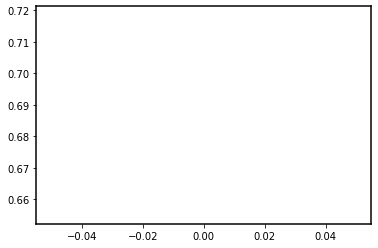

In [8]:
i = 0
for index, value in multiple_lines.items():
    x = range(len(value))
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    style = ["k-", "k--", "k:"]
    print(value)
    plt.plot(x, value, style[i % 3], label=index)
    i += 1
    if i == 2:
        plt.xlabel('K', fontweight='bold', fontsize=12)
        plt.ylabel('Performance', fontweight='bold', fontsize=12)
        plt.xticks(x)
        plt.grid(visible=False)
        plt.legend(frameon=False, ncol=1, fontsize=12)
        plt.savefig(data_folder + r"\GG_performance_{0}.png".format(index), transparent=True, dpi=300)
        plt.show()
        plt.clf()
    break
    

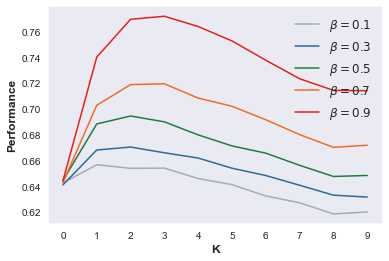

In [28]:
# SG Fitness
x = range(len(sg_fitness[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, sg_fitness[0], "k-", label="$\\beta={0}$".format(beta_list[0]), color=deep_grey)
plt.plot(x, sg_fitness[2][20:], "k-", label="$\\beta={0}$".format(beta_list[2]), color=nature_blue)
plt.plot(x, sg_fitness[4][40:], "k-", label="$\\beta={0}$".format(beta_list[4]), color=nature_green)
plt.plot(x, sg_fitness[6][60:], "k-", label="$\\beta={0}$".format(beta_list[6]), color=nature_orange)
plt.plot(x, sg_fitness[8][80:], "k-", label="$\\beta={0}$".format(beta_list[8]), color=morandi_red)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.grid(visible=False)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\SG_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

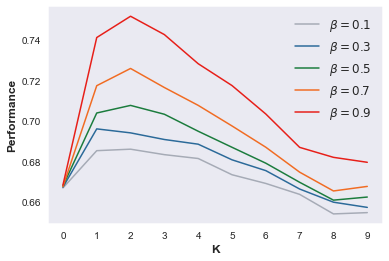

In [29]:
# SS Fitness
x = range(len(ss_fitness[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, ss_fitness[0], "k-", label="$\\beta={0}$".format(beta_list[0]), color=deep_grey)
plt.plot(x, ss_fitness[2][20:], "k-", label="$\\beta={0}$".format(beta_list[2]), color=nature_blue)
plt.plot(x, ss_fitness[4][40:], "k-", label="$\\beta={0}$".format(beta_list[4]), color=nature_green)
plt.plot(x, ss_fitness[6][60:], "k-", label="$\\beta={0}$".format(beta_list[6]), color=nature_orange)
plt.plot(x, ss_fitness[8][80:], "k-", label="$\\beta={0}$".format(beta_list[8]), color=morandi_red)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.grid(visible=False)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\SS_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

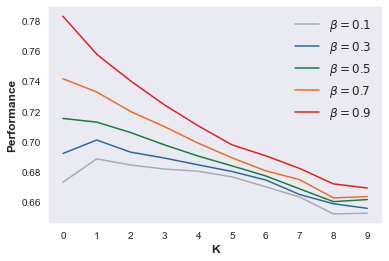

In [30]:
# GS Fitness
x = range(len(gs_fitness[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, gs_fitness[0], "k-", label="$\\beta={0}$".format(beta_list[0]), color=deep_grey)
plt.plot(x, gs_fitness[2][20:], "k-", label="$\\beta={0}$".format(beta_list[2]), color=nature_blue)
plt.plot(x, gs_fitness[4][40:], "k-", label="$\\beta={0}$".format(beta_list[4]), color=nature_green)
plt.plot(x, gs_fitness[6][60:], "k-", label="$\\beta={0}$".format(beta_list[6]), color=nature_orange)
plt.plot(x, gs_fitness[8][80:], "k-", label="$\\beta={0}$".format(beta_list[8]), color=morandi_red)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.grid(visible=False)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\SS_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

In [3]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
result = []
for xi in x:
    for yi in y:
        result.append([xi, yi])
print(result)
print(len(result))

[[0.1, 0.1], [0.1, 0.2], [0.1, 0.3], [0.1, 0.4], [0.1, 0.5], [0.1, 0.6], [0.1, 0.7], [0.1, 0.8], [0.1, 0.9], [0.2, 0.1], [0.2, 0.2], [0.2, 0.3], [0.2, 0.4], [0.2, 0.5], [0.2, 0.6], [0.2, 0.7], [0.2, 0.8], [0.2, 0.9], [0.3, 0.1], [0.3, 0.2], [0.3, 0.3], [0.3, 0.4], [0.3, 0.5], [0.3, 0.6], [0.3, 0.7], [0.3, 0.8], [0.3, 0.9], [0.4, 0.1], [0.4, 0.2], [0.4, 0.3], [0.4, 0.4], [0.4, 0.5], [0.4, 0.6], [0.4, 0.7], [0.4, 0.8], [0.4, 0.9], [0.5, 0.1], [0.5, 0.2], [0.5, 0.3], [0.5, 0.4], [0.5, 0.5], [0.5, 0.6], [0.5, 0.7], [0.5, 0.8], [0.5, 0.9], [0.6, 0.1], [0.6, 0.2], [0.6, 0.3], [0.6, 0.4], [0.6, 0.5], [0.6, 0.6], [0.6, 0.7], [0.6, 0.8], [0.6, 0.9], [0.7, 0.1], [0.7, 0.2], [0.7, 0.3], [0.7, 0.4], [0.7, 0.5], [0.7, 0.6], [0.7, 0.7], [0.7, 0.8], [0.7, 0.9], [0.8, 0.1], [0.8, 0.2], [0.8, 0.3], [0.8, 0.4], [0.8, 0.5], [0.8, 0.6], [0.8, 0.7], [0.8, 0.8], [0.8, 0.9], [0.9, 0.1], [0.9, 0.2], [0.9, 0.3], [0.9, 0.4], [0.9, 0.5], [0.9, 0.6], [0.9, 0.7], [0.9, 0.8], [0.9, 0.9]]
81


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list of data points called 'data' with 100 lines
# You can replace this with your actual data
data = np.random.rand(100)

# Define the number of rows and columns for your grid of subplots
num_rows = 5  # 5 rows
num_cols = 5  # 5 columns

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate over the subplots and plot every 4 lines
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j  # Calculate the starting index for each subplot
        start_line = index * 4  # Start line index for this subplot
        end_line = start_line + 4  # End line index for this subplot
        subset_data = data[start_line:end_line]  # Get the subset of data
        axs[i, j].plot(subset_data)  # Plot the data in the current subplot

# Adjust spacing between subplots for better visualization
plt.tight_layout()

# Save the figures or show them
for i in range(num_rows * num_cols):
    fig_name = f"figure_{i + 1}.png"
    plt.savefig(fig_name)  # Save each figure
    plt.clf()  # Clear the current figure for the next iteration

# If you want to display the figures, you can use plt.show()
plt.show()


<Figure size 864x720 with 0 Axes>